In [1]:
# ! pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage
from skimage.measure import block_reduce
from IPython.display import clear_output
import os

#### Testing for one folder

In [2]:
folder = 10
ts = "1000"
path = "/scratch/pdy2bw/MOSTRECENT_CLASS5_interp_files/" + str(folder) + "_dat" + "/Void_Collapse.interp.ts" + ts + ".dat"
# path = "/home/pdy2bw/Research/PARCv2/Void_Collapse.interp.ts0003000.dat"

os.path.exists(path)

read_data = np.genfromtxt(path, 
                        # skip_header = 14,
                        invalid_raise=False, 
                        missing_values=None)
clear_output(wait=True)

            # Remove U,V,rho,LS column (Keep X, Y, T, P)
            # temp_data = np.delete(read_data,[4],1)
            # Convert to pandas dataframe for easier processing
df = pd.DataFrame(read_data, columns =['X', 'Y', 'U','V', 'P', 'T', 'sp4', 'ls1']) 
df = df.drop(['sp4', 'ls1'], axis=1)
df

,X,Y,U,V,P,T
0,0.000000e+00,0.000000,1000.000,-8.909070e-13,9.348070e+09,553.245
1,5.155160e-08,0.000000,1000.010,7.416150e-14,9.348080e+09,553.245
2,1.031030e-07,0.000000,999.991,1.185390e-12,9.348300e+09,553.246
3,1.546550e-07,0.000000,999.992,6.104390e-13,9.348140e+09,553.244
4,2.062060e-07,0.000000,999.984,6.114810e-13,9.348030e+09,553.231
...,...,...,...,...,...,...
679995,5.129380e-05,0.000035,0.000,0.000000e+00,-1.235820e-05,298.150
679996,5.134530e-05,0.000035,0.000,0.000000e+00,-1.235820e-05,298.150
679997,5.139690e-05,0.000035,0.000,0.000000e+00,-1.235820e-05,298.150
679998,5.144840e-05,0.000035,0.000,0.000000e+00,-1.235820e-05,298.150


In [3]:
# Process temperature field
temperature_snapshot_raw = df.pivot_table(index='X', columns='Y', values='T').T.values
temperature_snapshot = pd.DataFrame(temperature_snapshot_raw).round(6).to_numpy()
temperature_snapshot = np.expand_dims(temperature_snapshot,axis = 2)

# Process pressure field
pressure_snapshot_raw = df.pivot_table(index='X', columns='Y', values='P').T.values
pressure_snapshot = pd.DataFrame(pressure_snapshot_raw).round(6).to_numpy()
pressure_snapshot = np.expand_dims(pressure_snapshot,axis = 2)

# Process microstructure field
microstructure_snapshot = temperature_snapshot

# Process velocity_x field
vx_snapshot_raw = df.pivot_table(index='X', columns='Y', values='U').T.values
vx_snapshot = pd.DataFrame(vx_snapshot_raw).round(6).to_numpy()
vx_snapshot = np.expand_dims(vx_snapshot,axis = 2)

# Process velocity_y field
vy_snapshot_raw = df.pivot_table(index='X', columns='Y', values='V').T.values
vy_snapshot = pd.DataFrame(vy_snapshot_raw).round(6).to_numpy()
vy_snapshot = np.expand_dims(vy_snapshot,axis = 2)

coupled_field_snapshot = np.concatenate([temperature_snapshot,
                                            pressure_snapshot,
                                            microstructure_snapshot,
                                            vx_snapshot,
                                            vy_snapshot], axis = 2)

In [4]:
print(coupled_field_snapshot.shape)

(680, 1000, 5)


#### Collecting all folders

In [5]:
# timesteps = ["0001000",
#            "0002000",
#            "0003000",
#            "0004000",
#            "0005000",
#            "0006000",
#            "0007000",
#            "0008000",
#            "0009000",
#            "0010000",
#            "0011000",
#            "0012000",
#            "0013000",
#            "0014000",
#            "0015000",
#            "0016000",
#            "0017000",
#            "0018000",
#            "0019000",
#            "0020000",
#            "0021000",
#            "0022000",
#            "0023000",
#            "0024000",
#            "0025000",
#            "0026000",
#            "0027000",
#            "0028000",
#            "0029000",
#            "0030000",
#            "0031000",
#            "0032000",
#            "0033000",
#            "0034000",
#            "0035000",
#            "0036000",
#            "0037000",
#            "0038000",
#            "0039000",
#            "0040000"]

timesteps = ["1000",
           "2000",
           "3000",
           "4000",
           "5000",
           "6000",
           "7000",
           "8000",
           "9000",
           "10000",
           "11000",
           "12000",
           "13000",
           "14000",
           "15000",
           "16000",
           "17000",
           "18000",
           "19000",
           "20000",
           "21000",
           "22000",
           "23000",
           "24000",
           "25000",
           "26000",
           "27000",
           "28000",
           "29000",
           "30000",
           "31000",
           "32000",
           "33000",
           "34000",
           "35000",
           "36000",
           "37000",
           "38000",
           "39000",
           "40000"]

In [6]:
folders = [9] # I manually typed in one folder at a time, I'm sure there is a better way to do this lol but you need to save each as its own .npy file
for folder in folders:
    idx = 0
    folder_exist = 0
    count = 0
    coupled_field_evolution = []
    for ts in timesteps:
        # if (idx == 0):
        # path = "/scratch/pdy2bw/Class5_InterpolatedData_BeforeBackTracking/" + str(folder) + "/Void_Collapse.interp.ts" + ts + ".dat"
        path = "/scratch/pdy2bw/MOSTRECENT_CLASS5_interp_files/" + str(folder) + "_dat" + "/Void_Collapse.interp.ts" + ts + ".dat"

        if os.path.exists(path) == 1:
            folder_exist = 1
            read_data = np.genfromtxt(path, 
                        # skip_header = 14,
                        invalid_raise=False, 
                        missing_values=None)
            clear_output(wait=True)

            # Remove U,V,rho,LS column (Keep X, Y, T, P)
            # temp_data = np.delete(read_data,[4],1)
            # Convert to pandas dataframe for easier processing
            # df = pd.DataFrame(read_data, columns =['X', 'Y', 'U','V', 'P', 'T']) # for 6 cols
            
            df = pd.DataFrame(read_data, columns =['X', 'Y', 'U','V', 'P', 'T', 'sp4', 'ls1'])  # for 8 cols
            df = df.drop(['sp4', 'ls1'], axis=1)

            # Process temperature field
            temperature_snapshot_raw = df.pivot_table(index='X', columns='Y', values='T').T.values
            temperature_snapshot = pd.DataFrame(temperature_snapshot_raw).round(6).to_numpy()
            temperature_snapshot = np.expand_dims(temperature_snapshot,axis = 2)
            # print(temperature_snapshot.shape)
            # # Process pressure field
            pressure_snapshot_raw = df.pivot_table(index='X', columns='Y', values='P').T.values
            pressure_snapshot = pd.DataFrame(pressure_snapshot_raw).round(6).to_numpy()
            pressure_snapshot = np.expand_dims(pressure_snapshot,axis = 2)

            # Process microstructure field
            microstructure_snapshot = temperature_snapshot

            # Process velocity_x field
            vx_snapshot_raw = df.pivot_table(index='X', columns='Y', values='U').T.values
            vx_snapshot = pd.DataFrame(vx_snapshot_raw).round(6).to_numpy()
            vx_snapshot = np.expand_dims(vx_snapshot,axis = 2)

            # Process velocity_y field
            vy_snapshot_raw = df.pivot_table(index='X', columns='Y', values='V').T.values
            vy_snapshot = pd.DataFrame(vy_snapshot_raw).round(6).to_numpy()
            vy_snapshot = np.expand_dims(vy_snapshot,axis = 2)

            coupled_field_snapshot = np.concatenate([temperature_snapshot,
                                                     pressure_snapshot,
                                                     microstructure_snapshot,
                                                     vx_snapshot,
                                                     vy_snapshot], axis = 2)
            coupled_field_snapshot[:,:,0][coupled_field_snapshot[:,:,0] < 300] = 300
            coupled_field_snapshot[:,:,0][coupled_field_snapshot[:,:,0] > 5000] = 5000

            coupled_field_snapshot[:,:,2][coupled_field_snapshot[:,:,2] > 280] = 280
            coupled_field_snapshot[:,:,2][coupled_field_snapshot[:,:,2] < 280] = 0
            # coupled_field_snapshot[:,:,2][coupled_field_snapshot[:,:,2] > 290] = 1
            # coupled_field_snapshot[:,:,0][coupled_field_snapshot[:,:,0] < 300] = 300
            # coupled_field_snapshot[:,:,0][coupled_field_snapshot[:,:,0] > 5000] = 5000

            coupled_field_evolution.append(coupled_field_snapshot)            
            # del path, read_data, temp_data, df, coupled_field_snapshot, pressure_snapshot, pressure_snapshot_raw, temperature_snapshot, temperature_snapshot_raw
            print("File exists!")
            count+=1
            print(count)
        # idx += 1
    # if folder_exist == 1:
        # save_data(void_no, coupled_field_evolution)
    coupled_field_evolution = np.concatenate(coupled_field_evolution,axis = 2)

    # void_no += 1

print(count)

File exists!
39
39


In [7]:
coupled_field_evolution.shape

(680, 1000, 195)

In [9]:
coupled_field_snapshot_check = np.array(coupled_field_evolution)

# coupled_field_snapshot_check[:,:,2::5][coupled_field_evolution[:,:,2::5] > 400] = 400
# coupled_field_snapshot_check[:,:,0::5][coupled_field_snapshot_check[:,:,0::5] < 310] = 310
# coupled_field_snapshot_check[:,:,0::5][coupled_field_snapshot_check[:,:,0::5] > 7000] = 7000

# coupled_field_snapshot_check[:,:,2::5][coupled_field_evolution[:,:,2::5] > 280] = 280
# coupled_field_snapshot_check[:,:,2::5][coupled_field_evolution[:,:,2::5] < 280] = 0

In [95]:
np.amax(coupled_field_snapshot_check[:,:,0::5])

4624.04

In [96]:
print(coupled_field_snapshot_check[:,:,10])

[[553.982 554.    554.    ... 300.    300.    300.   ]
 [554.447 554.452 554.424 ... 300.    300.    300.   ]
 [554.445 554.441 554.41  ... 300.    300.    300.   ]
 ...
 [553.26  553.26  553.26  ... 300.    300.    300.   ]
 [553.268 553.267 553.266 ... 300.    300.    300.   ]
 [553.271 553.271 553.269 ... 300.    300.    300.   ]]


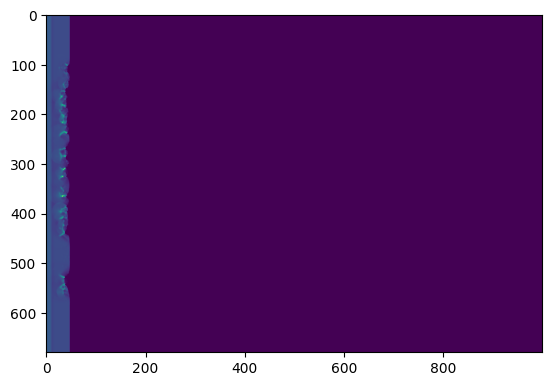

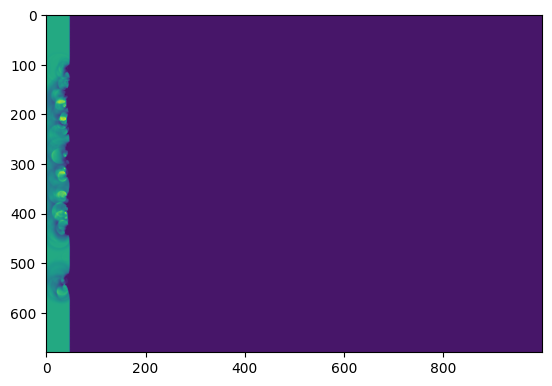

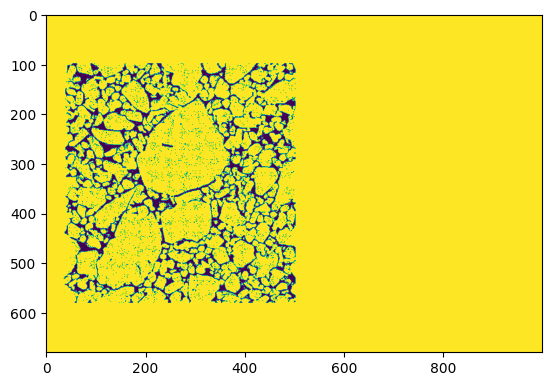

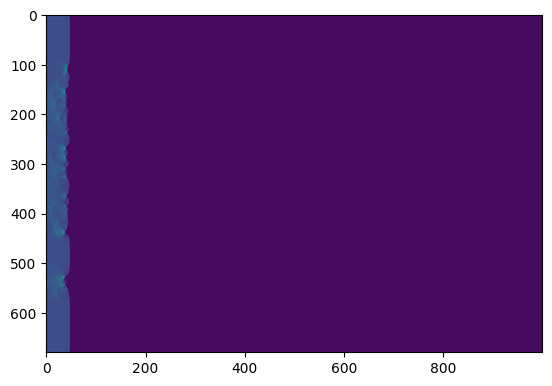

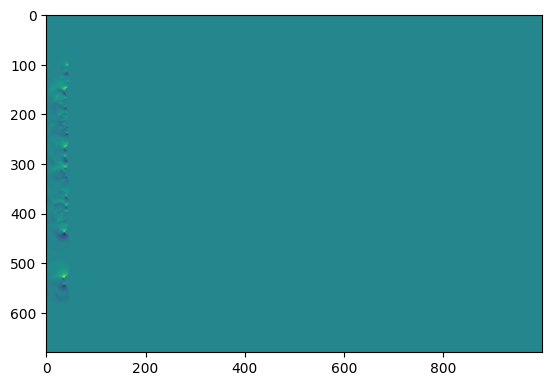

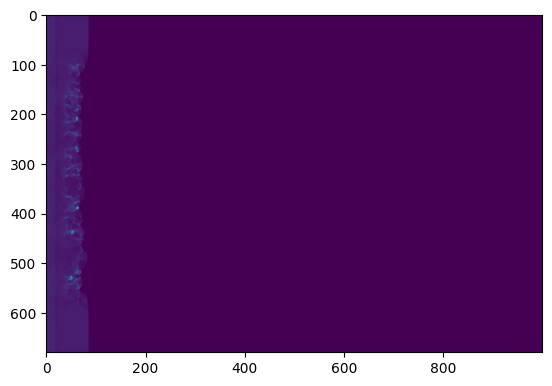

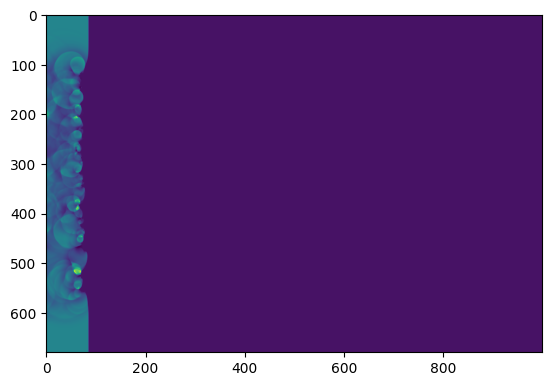

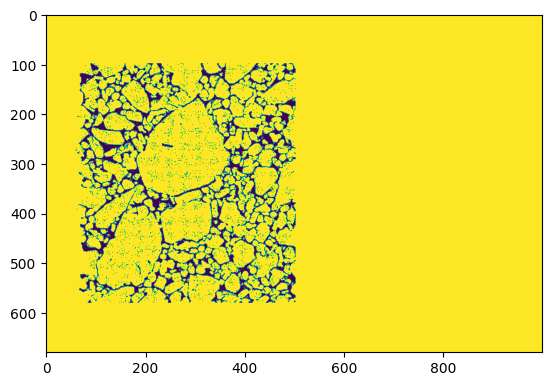

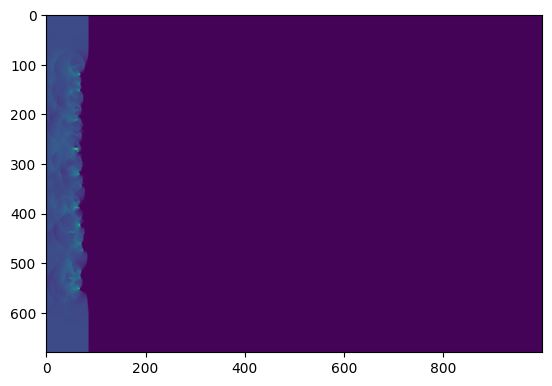

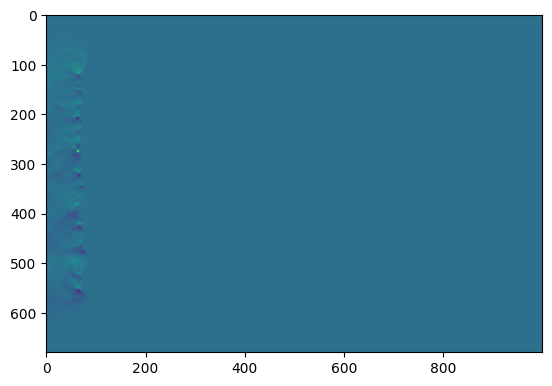

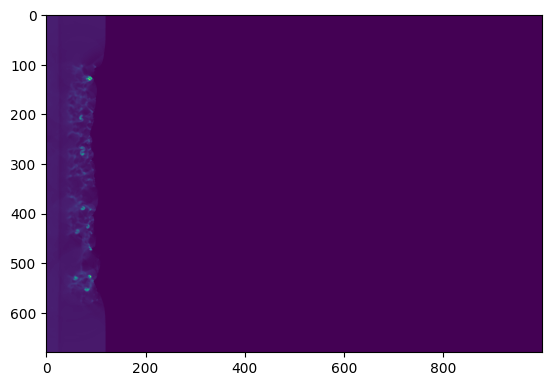

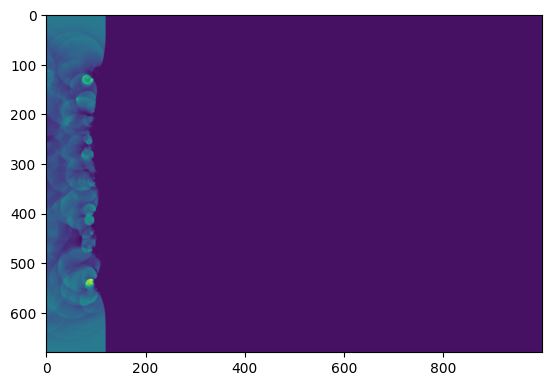

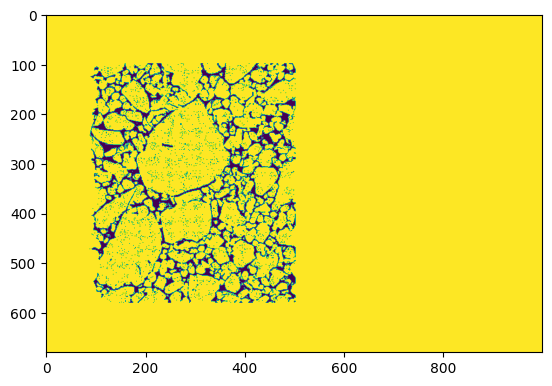

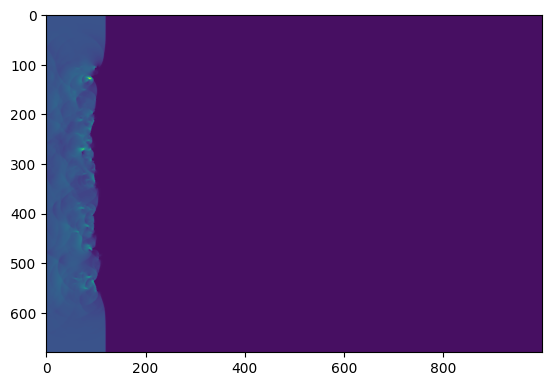

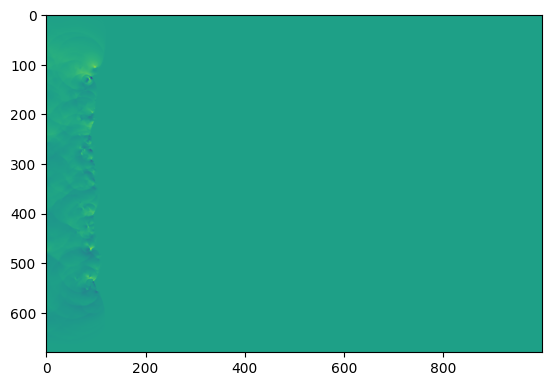

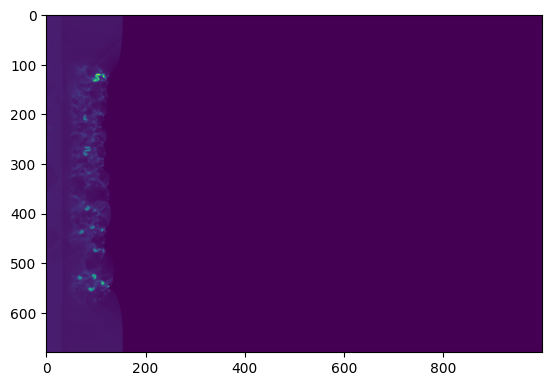

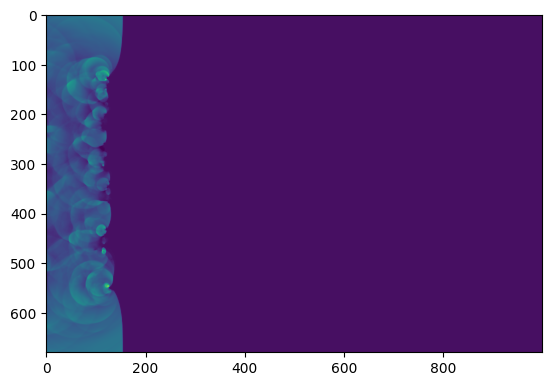

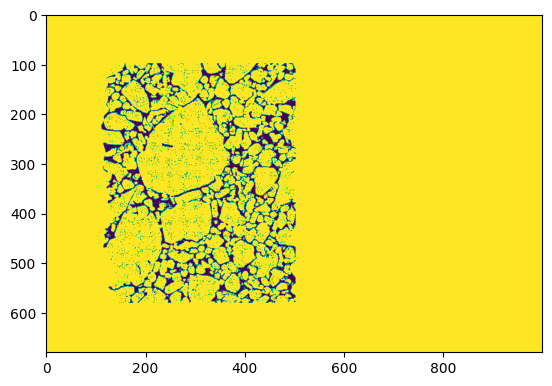

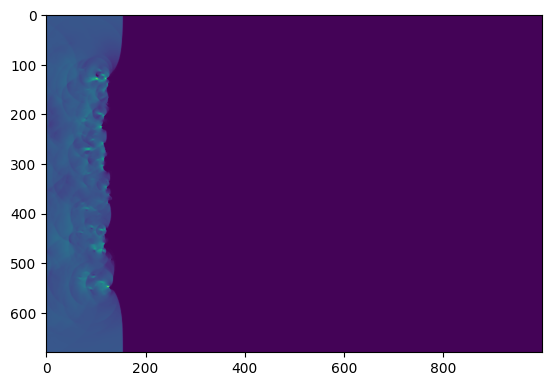

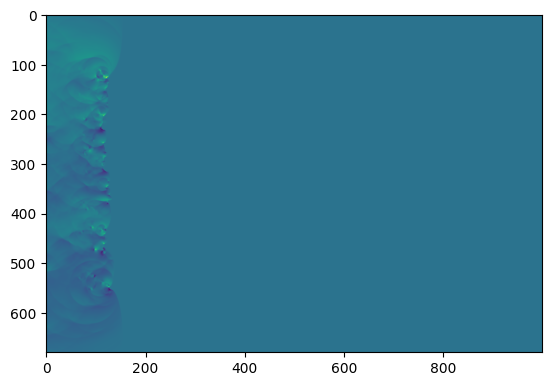

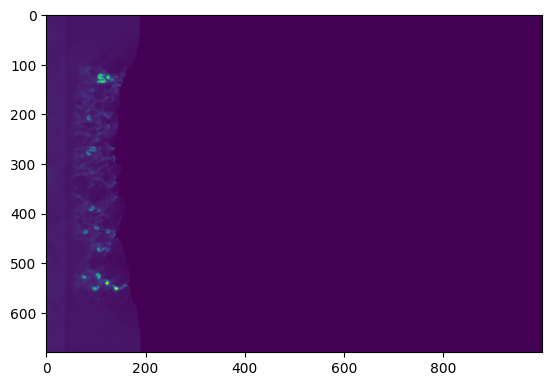

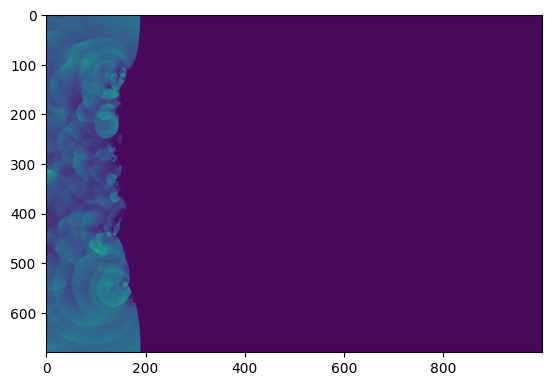

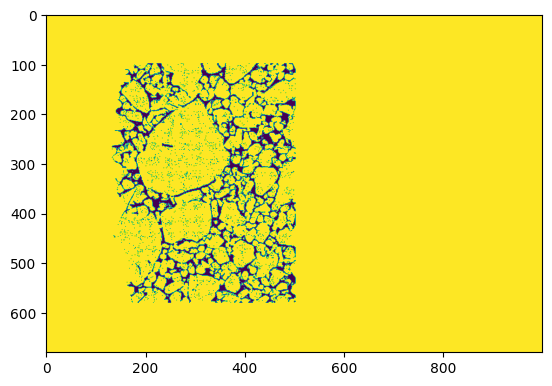

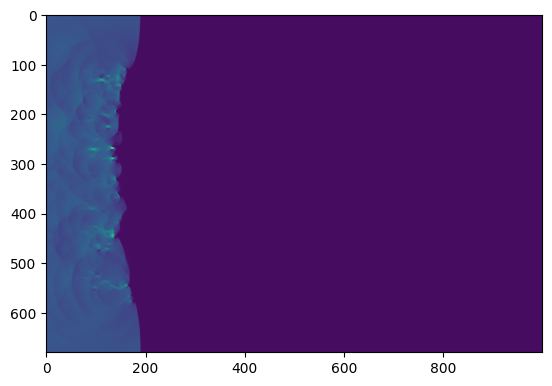

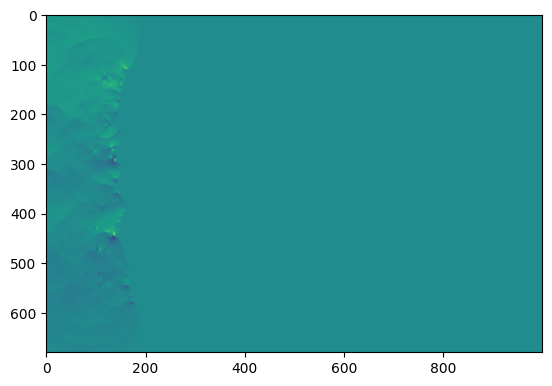

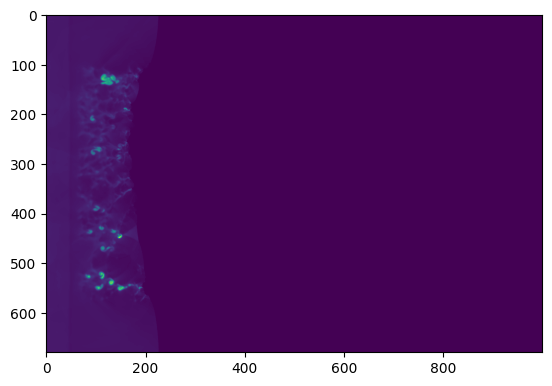

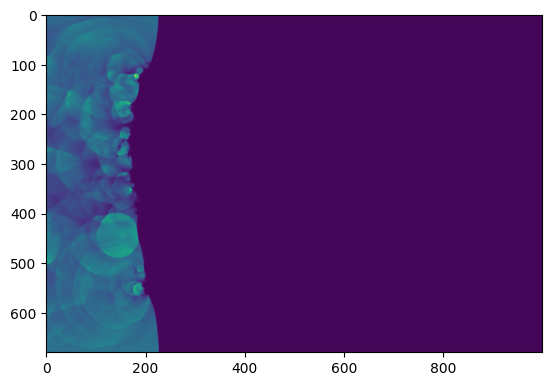

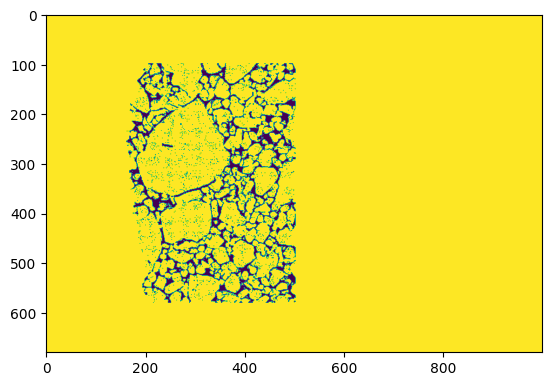

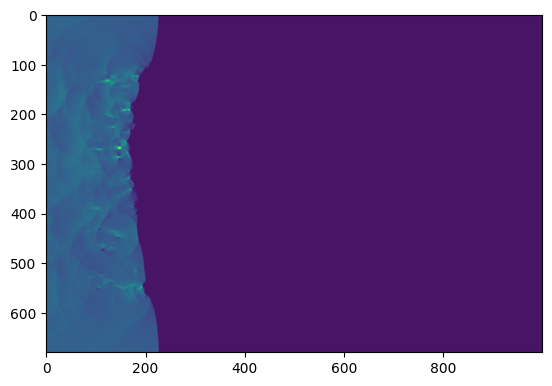

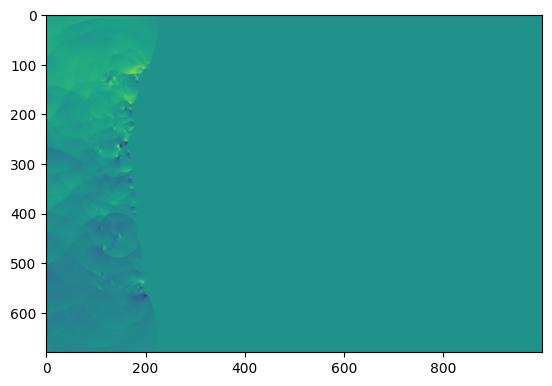

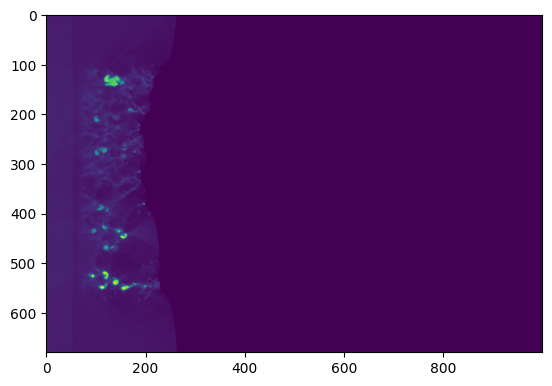

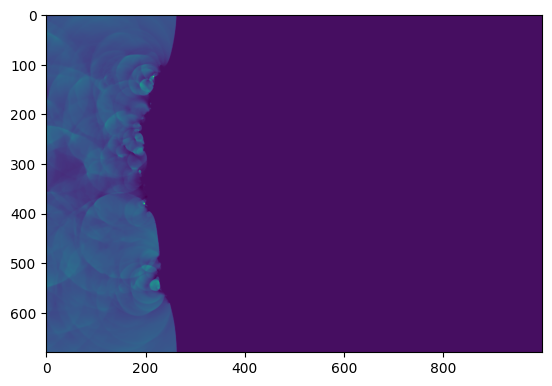

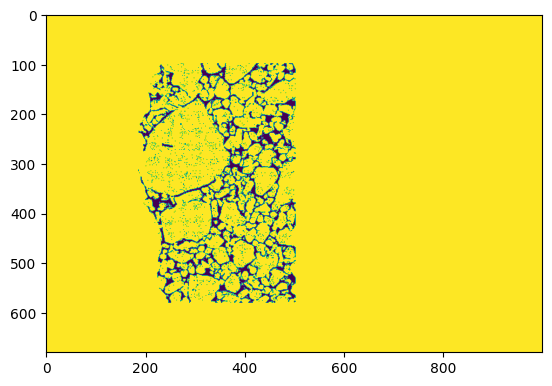

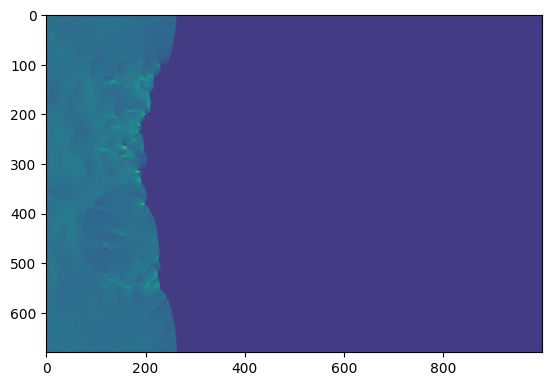

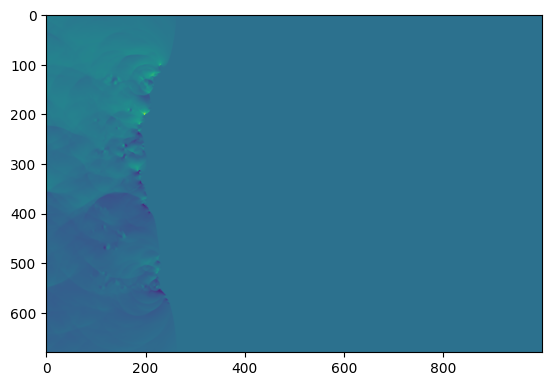

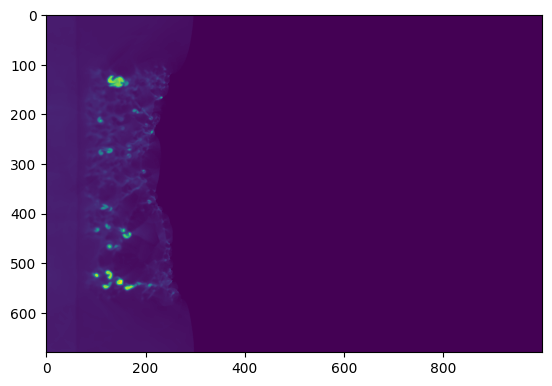

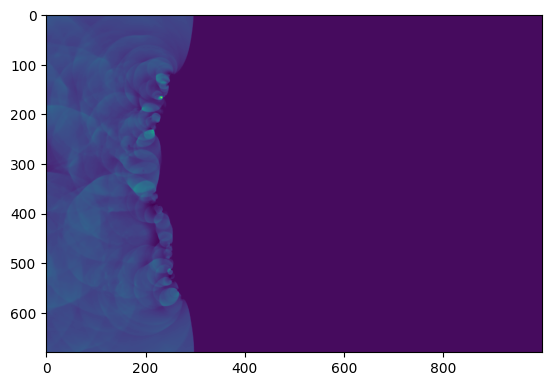

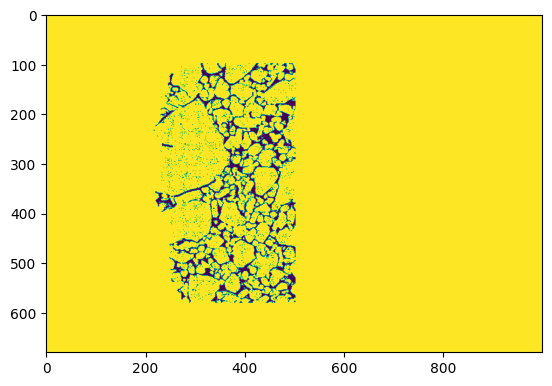

In [14]:
for i in range(38):
    plt.imshow(coupled_field_snapshot_check[:,:,i])
    plt.show()

In [98]:
np.save('/scratch/pdy2bw/class5_clean_dataMOSTRECENT/class5_9.npy',coupled_field_evolution)

#### disregard below, was for testing

### New Second Upload Data

In [ ]:
file = "Void_Collapse.interp.ts26000.dat"

In [6]:

#path = "/scratch/pdy2bw/Class5_InterpolatedData_BeforeBackTracking/" + str(folder) + "/Void_Collapse.interp.ts" + ts + ".dat"
path = "/home/pdy2bw/Research/PARCv2/Void_Collapse.interp.ts26000.dat"

os.path.exists(path)

read_data = np.genfromtxt(path, 
                        # skip_header = 14,
                        invalid_raise=False, 
                        missing_values=None)
clear_output(wait=True)

            # Remove U,V,rho,LS column (Keep X, Y, T, P)
            # temp_data = np.delete(read_data,[4],1)
            # Convert to pandas dataframe for easier processing
df = pd.DataFrame(read_data, columns =['X', 'Y', 'U','V', 'P', 'T', 'sp4', 'ls1']) 
df = df.drop(['sp4', 'ls1'], axis=1)
df.head(5)

,X,Y,U,V,P,T
0,0.000023,0.000034,1014.55,53.5335,1.106360e+10,481.689
1,0.000023,0.000034,1015.04,53.8856,1.107000e+10,481.609
2,0.000023,0.000034,1014.91,53.7737,1.106850e+10,481.726
3,0.000023,0.000034,1014.80,53.6899,1.106730e+10,481.806
4,0.000023,0.000034,1015.52,54.2213,1.107650e+10,481.532
